## 코로나와_온라인쇼핑_네이버_뉴스_감정분석

- 감성사전 출처 : https://github.com/park1200656/KnuSentiLex
- 네이버뉴스_코로나온라인쇼핑_뉴스크롤링 파일위치 (C:/Users/jminw/Untitled Folder/coron)
- 2020.09.01 ~ 2020.09.10 뉴스

In [1]:
import pandas as pd
import numpy as np

In [2]:
pos = pd.read_csv('pos_pol_word.csv')
neg = pd.read_csv('neg_pol_word.csv')

In [3]:
pos=list(pos['word'])

In [4]:
neg=list(neg['word'])

In [5]:
df= pd.DataFrame(pd.read_csv('coron.csv', encoding='cp949'))

In [6]:
import re 
# '한글'을 제외한 다른 문자 모두 제거
remove_except_ko = re.compile(r"[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]")
def preprocess(text):
    text = re.sub(remove_except_ko,' ',text).strip()
    return text

df['contents'] = df['contents'].map(lambda x : preprocess(x))
df.tail()

,Unnamed: 0,years,company,title,contents,link
19,20,2020.09.09.,KBS,명절 준비도 ‘비대면’으로…“온라인·배송 확대”,코로나 가 다시 확산하고 있는 가운데 추석이 한 달 앞으로 다가왔습니다 유통업계...,https://news.naver.com/main/read.nhn?mode=LSD&...
20,21,2020.09.08.,연합뉴스,횡성군 중소기업 쇼핑몰 오픈…코로나19 극복 지원,강원 횡성군이 중소기업 전용 쇼핑몰 횡성몰 을 오픈하고 신종 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
21,22,2020.09.10,한국정책신문,"코로나19에 온라인쇼핑 증가, 소비자 사로잡으려면..",마켓 옥션 인터파크 번가 쿠팡 마켓컬리 위메프 티몬 등 온라인쇼핑 ...,http://www.kpinews.co.kr/news/articleView.html...
22,23,2020.09.03,한국경제,코로나·장마에 7월 온라인쇼핑 거래액 '최대'…식품 배달 크게 늘어,지난 월 온라인쇼핑 거래액이 년 관련 통계 작성 이후 최대치를 기록했다 ...,https://www.hankyung.com/life/article/20200903...
23,24,2020.09.03,아이뉴스24,코로나에 장마 덮친 7월 '집콕'…온라인쇼핑 거래액 13조,코로나 와 장마 등으로 집콕 상황이 이어지면서 지난 월 온라인쇼핑 거래액이 ...,http://www.inews24.com/view/1296201


In [7]:
# Mecab
from konlpy.tag import Mecab
# 선언
mecab= Mecab()

In [8]:
stop_words = ['은','는','이','가','을','를','께서','에서','이다','에게','으로','이랑','까지','부터','하다',
             '기자','뉴스','무단','전재','및','재배포','금지','저작권','사진','김병기','앵커','이연춘','연합뉴스',
             '파이낸셜뉴스','습니다','입니다']
stopPos = ['JKS','JKC','JKG','JKO','JKB','JKV','JKQ','JC','JX',
           'SF','SE','SS','SP','SSO','SSC','SC','SY','SH','SL','SN',
           'MM','MAG','MAJ']
def token_mecab(text):
    text = mecab.pos(text)
    text = [i for i in text if len(i[0])>1]
    text = [i for i in text if i[0] not in stop_words]
    text = [i[0] for i in text if i[1] not in stopPos]
    return text

In [9]:
token_mecab('쿠팡이 코로나19로 판로를 잃고 어려움을 겪고 있는 소상공인과 지역농가를 위해 발 벗고 나섰다.쿠팡은 중소상공인희망재단, 서울시와 손잡고')

['쿠팡',
 '코로나',
 '판로',
 '어려움',
 '소상',
 '공인',
 '지역',
 '농가',
 '위해',
 '나섰',
 '쿠팡',
 '중소',
 '상공',
 '희망',
 '재단',
 '서울시',
 '손잡']

In [10]:
def make_tokens(df):
    df['tokens'] = ''
    tokens_list=[]
    for i in range(len(df)):
        token = token_mecab(df['contents'][i])
        df['tokens'][i] = ' '.join(token)
    return df

df = make_tokens(df)

C:\Data\envs\py37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
# 공백으로 토큰 분리
def my_tokenizer(text):
    return text.split()

In [12]:
df['tokens']

0     공대 마트 운영 녹색 온라인 인터 파크 열렸 올해 코로나 인해 온라인 쇼핑몰 이용자...
1     환경 산업 기술원 녹색 제품 기획 전환 경부 산하 한국 환경 산업 기술원 원장 유제...
2     농림 축산 식품 한국 농수산 식품 유통 공사 농공 기업 기획 진행 쿠팡 코로나 판로...
3     서울시 온라인 쇼핑 운영 경험 소상 공인 전통 시장 상인 대상 온라인 시장 진출 지...
4     상공 쿠팡 입점 지원 판매 수수료 인하 전통 시장 온라인 시장 진입 는다 온라인 장...
5     모바일 홈쇼핑 포털 애플리케이션 쇼핑 모아 운영 버즈 공동 대표 남상협 김성국 쇼핑...
6     광복 자갈치시장 송관 만들 전통 시장 온라인 판매 롯데 백화점 광복 부산 자갈치 시...
7     부산 지역 최대 수산물 시장 자갈치 시장 롯데 백화점 광복 코로나 불황 이겨 고자 ...
8     라이브 공연 커머스 결합 라이브 라떼 출시 공연 면서 아이돌 판매 가능 서울시 지역...
9     미래학자 제이슨 초대 세계 변화 농업 미래 전략 대담 농림 축산 식품 대한민국 농업...
10    대구시 사회 경제 기업 판로 지원 위해 온라인 쇼핑 마켓 개설 구시 동구 사회 경제...
11    프레시 지역 농가 지원 온라인 유통 업계 최근 신종 코로나 바이러스 감염증 코로나 ...
12    특산물 판매 문화 행사 영동군 주최 프로젝트 충북 영동군 신종 코로나 바이러스 감염...
13    삼성 직원 겨냥 이벤트 다음 중순 운영 협력 업체 물품 대금 조기 지급 삼성전자 직...
14    농축 수산물 음식 서비스 지난 오후 서울 노원구 롯데마트 중계 직원 온라인 주문 상...
15    오전 서울 중구 북창동 순두부 관계자 배달 코로나 확산 음식 조리 거나 배달 경우 ...
16    국내 코로나 사태 지속 가운데 악천후 겹치 면서 온라인 생필품 구매 사람 늘어났 악...
17    면역력 관심 반영 수출 내수 급증 투입 집중 육성 북도 최근 면역 강화식품 

In [14]:
s = df['tokens']

In [15]:
#s = np.array(s)
#s[0].split()

In [16]:
df.head(1)

,Unnamed: 0,years,company,title,contents,link,tokens
0,1,2020.09.09.,OhmyNews,"코로나19 시대, 친환경 '온라인 녹색매장' 열린다",제공대형마트 등에서 운영하던 녹색매장 이 온라인 인터파크 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,공대 마트 운영 녹색 온라인 인터 파크 열렸 올해 코로나 인해 온라인 쇼핑몰 이용자...


In [17]:
긍정ls=[]
부정ls=[]
for i in range(len(s)):
    긍정= 부정=0
    for token in s[i].split():
        if token in pos:
            긍정+= 1
        if token in neg: 
            부정+= 1
    긍정ls.append(긍정)
    부정ls.append(부정)

In [18]:
긍정ls

[1, 1, 15, 5, 7, 2, 2, 3, 1, 12, 3, 11, 9, 3, 0, 1, 4, 9, 5, 3, 1, 3, 0, 0]

In [19]:
부정ls

[1, 1, 5, 1, 2, 0, 2, 2, 0, 0, 1, 2, 5, 1, 0, 0, 1, 1, 2, 1, 2, 3, 1, 0]

In [20]:
df['positive']=긍정ls

In [21]:
df['negative']=부정ls

In [88]:
df.head()

,Unnamed: 0,years,company,title,contents,link,tokens,positive,negative,tone
0,1,2020.09.09.,OhmyNews,"코로나19 시대, 친환경 '온라인 녹색매장' 열린다",제공대형마트 등에서 운영하던 녹색매장 이 온라인 인터파크 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,공대 마트 운영 녹색 온라인 인터 파크 열렸 올해 코로나 인해 온라인 쇼핑몰 이용자...,1,1,0.000000
1,2,2020.09.09.,헤럴드경제,"“친환경 제품, 온라인 녹색매장서 구매하세요”",환경산업기술원 녹색제품 기획전환경부 산하 한국환경산업기술원 원장 유제철 사진 은 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,환경 산업 기술원 녹색 제품 기획 전환 경부 산하 한국 환경 산업 기술원 원장 유제...,1,1,0.000000
2,3,2020.09.10.,ZDNet Korea,"쿠팡, 소상공인 온라인 판로 지원",농림축산식품부 한국농수산식품유통공사와 농공상기업 돕는 기획전 진행 쿠팡이 코로나...,https://news.naver.com/main/read.nhn?mode=LSD&...,농림 축산 식품 한국 농수산 식품 유통 공사 농공 기업 기획 진행 쿠팡 코로나 판로...,15,5,19.666667
3,4,2020.09.09.,financial news,"서울시, 소상공인·전통시장 온라인 진출 지원한다",서울시는 온라인쇼핑 운영 경험이 많지 않은 소상공인과 전통시장 상인을 대상으로 온라...,https://news.naver.com/main/read.nhn?mode=LSD&...,서울시 온라인 쇼핑 운영 경험 소상 공인 전통 시장 상인 대상 온라인 시장 진출 지...,5,1,5.800000
4,5,2020.09.09.,뉴스1,"서울시, '언택트 시대' 소상공인·전통시장 상인 온라인 진출 지원",소상공인 곳 쿠팡 등 입점 지원 판매수수료 인하전통시장 온라인시장 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,상공 쿠팡 입점 지원 판매 수수료 인하 전통 시장 온라인 시장 진입 는다 온라인 장...,7,2,8.714286


In [31]:
tone=[]

for i in range(len(df)):
    if df['positive'][i]-df['negative'][i] and df['positive'][i]-df['negative'][i] > 0 :
        to = (df['positive'][i]-df['negative'][i] / df['positive'][i] + df['negative'][i])
    else:
        to = 0
    tone.append(to)

In [32]:
df['tone'] = tone

### 시각화

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
# 20200903 평균
s20200903 = df.loc[[14, 15, 22, 23]]
s20200903_mean = s20200903['tone'].mean()
s20200903_mean

0.25

In [62]:
# 20200908 평균
s20200908 = df[df['years'] == '2020.09.08.']
s20200908_mean = s20200908['tone'].mean()
s20200908_mean

2.375

In [63]:
# 20200909 평균
s20200909 = df[df['years'] == '2020.09.09.']
s20200909_mean = s20200909['tone'].mean()
s20200909_mean

4.535642135642136

In [64]:
# 20200910 평균
s20200910 = df.loc[[2, 5, 8, 9, 11, 17, 21]]
s20200910_mean = s20200910['tone'].mean()
s20200910_mean

8.196248196248195

In [71]:
df1 = pd.DataFrame({'20200903':[s20200903_mean],'20200908' : [s20200908_mean],'20200909' :[s20200909_mean],'20200910' :[s20200910_mean]}, index=['importance'])

In [72]:
df1

,20200903,20200908,20200909,20200910
importance,0.25,2.375,4.535642,8.196248


In [86]:
import seaborn as sns
sns.set_theme(style="whitegrid")

<AxesSubplot:>

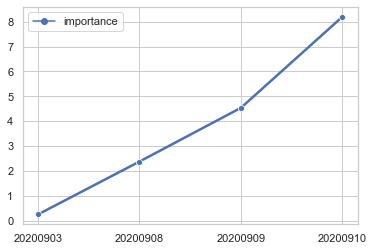

In [87]:
sns.lineplot(data=df1.T, linewidth=2.5, markers=True)